# Imports

In [205]:
import numpy as np
import matplotlib.pyplot as plt


# Array generation

In [206]:
def generate_array(batch_size : int, shape : list) -> np.ndarray:
  return np.random.randint(1, 100, size=[batch_size] + shape)


Generating test array for activation functions

In [207]:
array = generate_array(4, [2, 2])
print(array)

[[[80 17]
  [18  2]]

 [[38 58]
  [26 74]]

 [[55 86]
  [52 65]]

 [[53 71]
  [34 20]]]


# Activation functions

## Relu6


In [209]:
def relu6(input_array : np.ndarray) -> np.ndarray:
  return np.minimum(np.maximum(0, input_array), 6)

In [210]:
relu6(array)

array([[[6, 6],
        [6, 2]],

       [[6, 6],
        [6, 6]],

       [[6, 6],
        [6, 6]],

       [[6, 6],
        [6, 6]]])

In [211]:
def relu6_derivative(input_array: np.ndarray) -> np.ndarray:
    return np.where(input_array <= 0, 0, np.where((0 < input_array) & (input_array < 6), 1, 0))

In [212]:
relu6_derivative(array)

array([[[0, 0],
        [0, 1]],

       [[0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0]]])

In [213]:
x_values = np.linspace(-5, 8, 100)
relu6_values = relu6(x_values)
relu6_derivative_values = relu6_derivative(x_values)

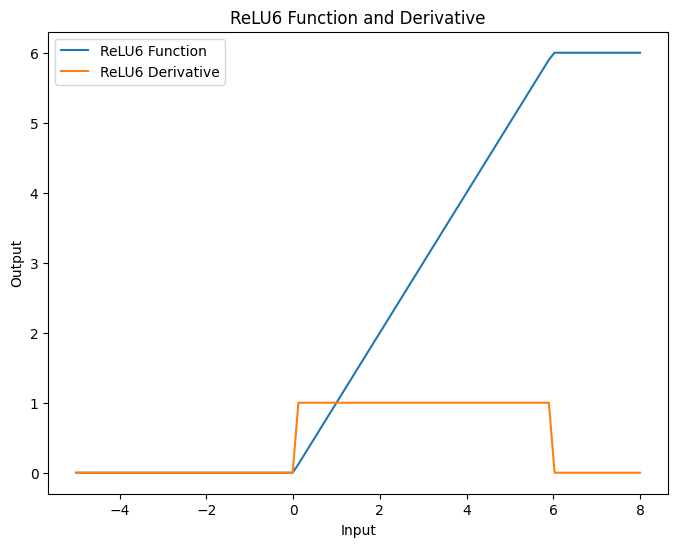

In [214]:
plt.figure(figsize=(8, 6))
plt.plot(x_values, relu6_values, label='ReLU6 Function')
plt.plot(x_values, relu6_derivative_values, label='ReLU6 Derivative')
plt.title('ReLU6 Function and Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

## ELU


In [215]:
def elu(input_array : np.ndarray, alpha=1.0) -> np.ndarray:
    return np.where(input_array > 0, input_array, alpha * (np.exp(input_array) - 1))

In [216]:
elu(array)

array([[[80., 17.],
        [18.,  2.]],

       [[38., 58.],
        [26., 74.]],

       [[55., 86.],
        [52., 65.]],

       [[53., 71.],
        [34., 20.]]])

In [217]:
def elu_derivative(input_array : np.ndarray, alpha=1.0) -> np.ndarray:
    return np.where(input_array > 0, 1, np.exp(input_array) * alpha)

In [218]:
elu_derivative(array)

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])

In [219]:
x_values = np.linspace(-5, 5, 100)
elu_values = elu(x_values)
elu_derivative_values = elu_derivative(x_values)

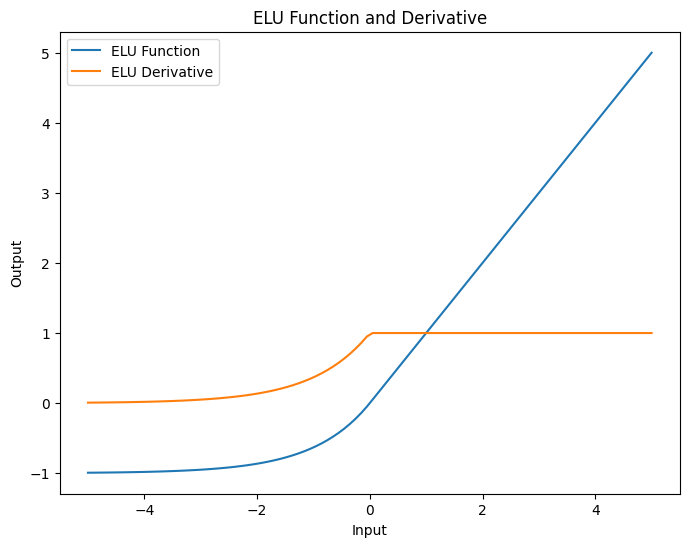

In [220]:
plt.figure(figsize=(8, 6))
plt.plot(x_values, elu_values, label='ELU Function')
plt.plot(x_values, elu_derivative_values, label='ELU Derivative')
plt.title('ELU Function and Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

## Softplus

In [221]:
def softplus(input_array : np.ndarray) -> np.ndarray:
    return np.log(1 + np.exp(input_array))

In [222]:
softplus(array)

array([[[80.        , 17.00000004],
        [18.00000002,  2.12692801]],

       [[38.        , 58.        ],
        [26.        , 74.        ]],

       [[55.        , 86.        ],
        [52.        , 65.        ]],

       [[53.        , 71.        ],
        [34.        , 20.        ]]])

In [223]:
def softplus_derivative(input_array : np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-input_array))

In [224]:
softplus_derivative(array)

array([[[1.        , 0.99999996],
        [0.99999998, 0.88079708]],

       [[1.        , 1.        ],
        [1.        , 1.        ]],

       [[1.        , 1.        ],
        [1.        , 1.        ]],

       [[1.        , 1.        ],
        [1.        , 1.        ]]])

In [225]:
x_values = np.linspace(-5, 5, 100)
softplus_values = softplus(x_values)
softplus_derivative_values = softplus_derivative(x_values)

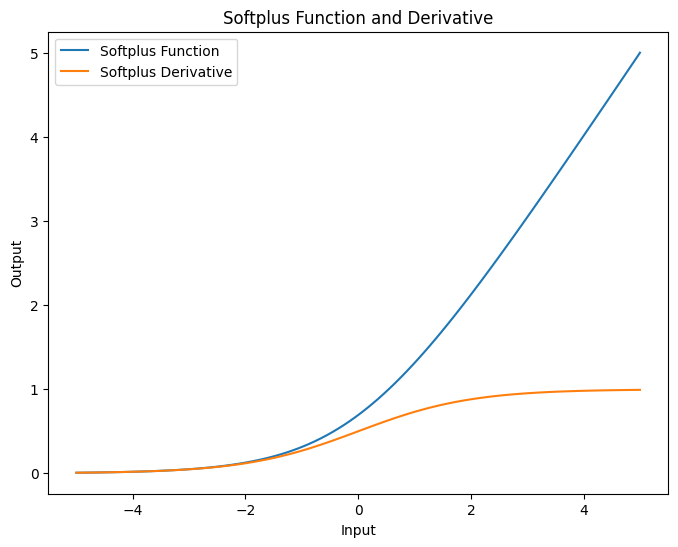

In [226]:
plt.figure(figsize=(8, 6))
plt.plot(x_values, softplus_values, label='Softplus Function')
plt.plot(x_values, softplus_derivative_values, label='Softplus Derivative')
plt.title('Softplus Function and Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

## Mish


In [227]:
def mish(input_array : np.ndarray) -> np.ndarray:
    return input_array * np.tanh(softplus(input_array))

In [228]:
mish(array)

array([[[80.        , 17.        ],
        [18.        ,  1.94395896]],

       [[38.        , 58.        ],
        [26.        , 74.        ]],

       [[55.        , 86.        ],
        [52.        , 65.        ]],

       [[53.        , 71.        ],
        [34.        , 20.        ]]])

In [229]:
def mish_derivative(input_array : np.ndarray) -> np.ndarray:
    w = 4 * (input_array + 1) + 4 * np.exp(2 * input_array) + np.exp(3 * input_array) + np.exp(input_array) * (4 * input_array + 6)
    sigma = 2 * np.exp(input_array) + np.exp(2 * input_array) + 2
    return (np.exp(input_array) * w) / (sigma ** 2)

In [230]:
mish_derivative(array)

array([[[1.        , 1.        ],
        [1.        , 1.06931793]],

       [[1.        , 1.        ],
        [1.        , 1.        ]],

       [[1.        , 1.        ],
        [1.        , 1.        ]],

       [[1.        , 1.        ],
        [1.        , 1.        ]]])

In [231]:
x_values = np.linspace(-5, 5, 100)
mish_values = mish(x_values)
mish_derivative_values = mish_derivative(x_values)

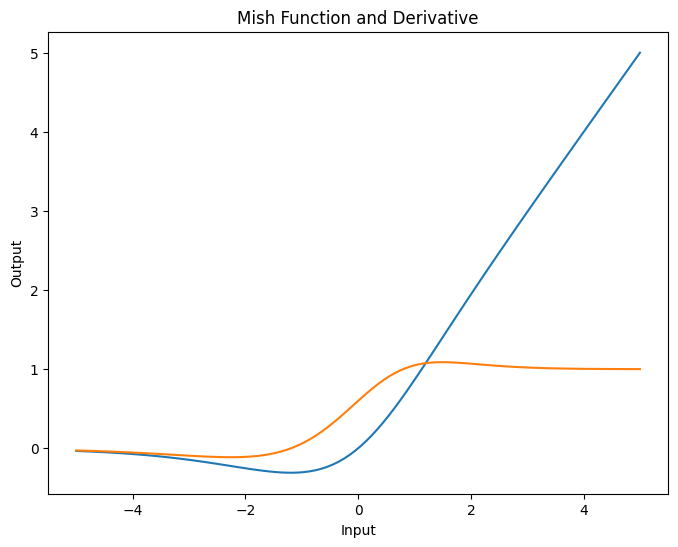

In [232]:
plt.figure(figsize=(8, 6))
plt.plot(x_values, mish_values, label='Mish Function')
plt.plot(x_values, mish_derivative_values, label='Mish Derivative')
plt.title('Mish Function and Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

## Gelu

In [233]:
def gelu(input_array : np.ndarray) -> np.ndarray:
    sqrt_2_over_pi = np.sqrt(2 / np.pi)
    return 0.5 * input_array * (1 + np.tanh(sqrt_2_over_pi * (input_array + 0.044715 * input_array**3)))

In [234]:
gelu(array)

array([[[80.        , 17.        ],
        [18.        ,  1.95459769]],

       [[38.        , 58.        ],
        [26.        , 74.        ]],

       [[55.        , 86.        ],
        [52.        , 65.        ]],

       [[53.        , 71.        ],
        [34.        , 20.        ]]])

In [235]:
def gelu_derivative(input_array : np.ndarray) -> np.ndarray:
    sqrt_2_over_pi = np.sqrt(2 / np.pi)
    tanh_term = np.tanh(sqrt_2_over_pi * (input_array + 0.044715 * input_array**3))
    return 0.5 * (1 + tanh_term) + 0.5 * input_array * (1 - tanh_term**2) * sqrt_2_over_pi * (1 + 0.134145 * input_array**2)


In [236]:
gelu_derivative(array)

array([[[1.        , 1.        ],
        [1.        , 1.08609926]],

       [[1.        , 1.        ],
        [1.        , 1.        ]],

       [[1.        , 1.        ],
        [1.        , 1.        ]],

       [[1.        , 1.        ],
        [1.        , 1.        ]]])

In [237]:
x_values = np.linspace(-5, 5, 100)
gelu_values = gelu(x_values)
gelu_derivative_values = gelu_derivative(x_values)

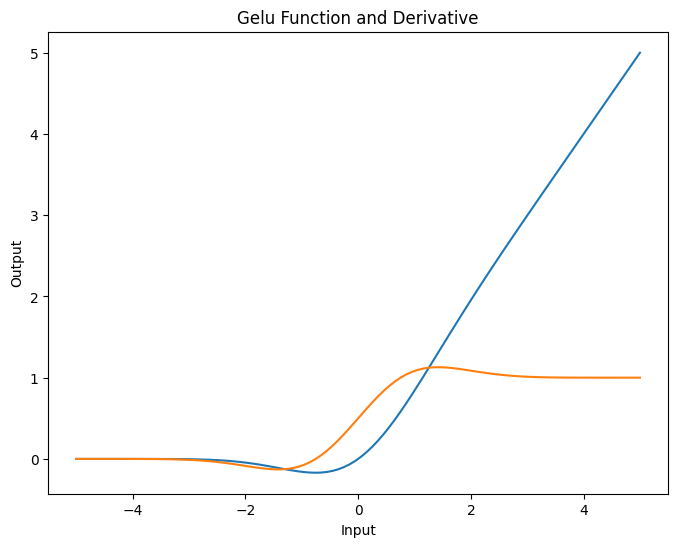

In [238]:
plt.figure(figsize=(8, 6))
plt.plot(x_values, gelu_values, label='Gelu Function')
plt.plot(x_values, gelu_derivative_values, label='Gelu Derivative')
plt.title('Gelu Function and Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

# Loss functions

## KLDiv

In [276]:
def kldiv_loss(y_pred : array, y_true : np.array) -> np.float64:
  return y_true * np.log(y_true / y_pred)

In [277]:
y_pred = np.linspace(0.01, 0.99, 100)
y_true = np.ones(100)

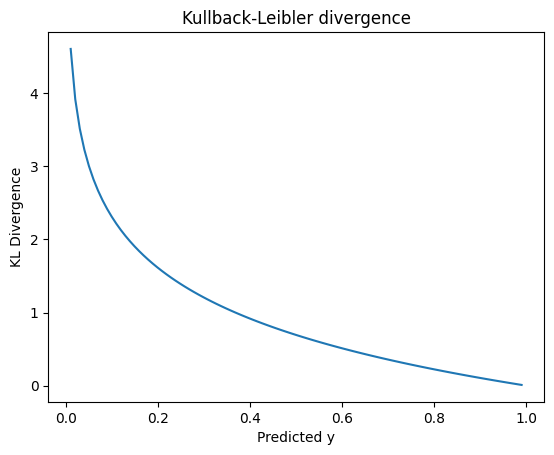

In [281]:
plt.plot(y_pred,  kldiv_loss(y_pred, y_true));
plt.title('Kullback-Leibler divergence');
plt.xlabel('Predicted y');
plt.ylabel('KL Divergence');

## Wing loss

In [302]:
def wing_loss(y_true: np.array, y_pred : np.array, w=6, epsilon=3) -> np.float64:
    diff = np.abs(y_true - y_pred)
    quadratic_loss = np.where(diff < w,
                              w * np.log(1 + diff / epsilon),
                              diff - (w - epsilon))

    return quadratic_loss

In [303]:
y_true_values = np.linspace(-5, 5, 100)
y_pred_values = np.zeros_like(y_true_values)
loss_values = wing_loss(y_true_values, y_pred_values)


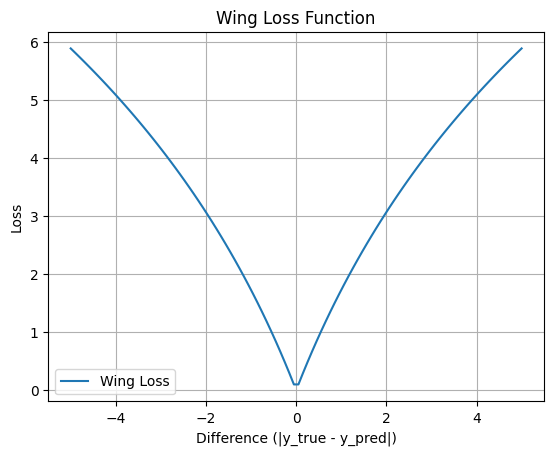

In [304]:
plt.plot(y_true_values, loss_values, label='Wing Loss')
plt.title('Wing Loss Function')
plt.xlabel('Difference (|y_true - y_pred|)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## SmoothL1


In [305]:
def smooth_l1_loss(y_true: np.array, y_pred : np.array) -> np.float64:
    diff = np.abs(y_pred - y_true)
    loss = np.where(diff < 1, 0.5 * diff**2, diff - 0.5)
    return loss

In [306]:
y_true_values = np.linspace(-5, 5, 100)
y_pred_values = np.zeros_like(y_true_values)
loss_values = smooth_l1_loss(y_true_values, y_pred_values)


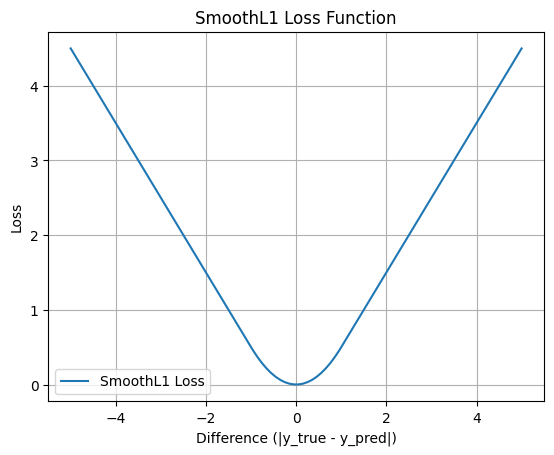

In [308]:
plt.plot(y_true_values, loss_values, label='SmoothL1 Loss')
plt.title('SmoothL1 Loss Function')
plt.xlabel('Difference (|y_true - y_pred|)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()